# How much do humans agree on classifications?

In [1]:
from pyclouds.imports import *
from pyclouds.helpers import *
from pyclouds.zooniverse import *
from pyclouds.load_config import load_configuration
%matplotlib inline

plt.rc("axes.spines", top=False, right=False)
sns.set_context('talk')
sns.set_style('ticks')

%load_ext autoreload
%autoreload 2

In [39]:
CONFIG = load_configuration('../config/CONFIG_SR.ini')

In [41]:
IMG_PATH = CONFIG['IMG_PATH']['IMG_PATH']; IMG_PATH

'/project/meteo/work/S.Rasp/cloud-classification/'

In [2]:
clas_fn = '../zooniverse_raw/sugar-flower-fish-or-gravel-classifications_18_12_16.csv'
subj_fn = '../zooniverse_raw/sugar-flower-fish-or-gravel-subjects_18_11_05.csv'

In [63]:
# Load files from basic-analysis.ipynb
clas_prac = pd.read_csv('/local/tmp/clas_prac.csv', index_col=0)
clas_full = pd.read_csv('/local/tmp/clas_full.csv', index_col=0)
annos_prac = pd.read_csv('/local/tmp/annos_prac.csv', index_col=0)
annos_full = pd.read_csv('/local/tmp/annos_full.csv', index_col=0)

In [64]:
subj = load_classifications(subj_fn)

In [65]:
subj.head()

subject_id  project_id  workflow_id  subject_set_id  \
0    26976345        7699          NaN           60713   
1    26976346        7699          NaN           60713   
2    26976347        7699          NaN           60713   
3    26976348        7699          NaN           60713   
4    26976349        7699          NaN           60713   

                                            metadata  \
0  {'fn': '/project/meteo/work/S.Rasp/cloud-class...   
1  {'fn': '/project/meteo/work/S.Rasp/cloud-class...   
2  {'fn': '/project/meteo/work/S.Rasp/cloud-class...   
3  {'fn': '/project/meteo/work/S.Rasp/cloud-class...   
4  {'fn': '/project/meteo/work/S.Rasp/cloud-class...   

                                           locations  classifications_count  \
0  {"0":"https://panoptes-uploads.zooniverse.org/...                      0   
1  {"0":"https://panoptes-uploads.zooniverse.org/...                      0   
2  {"0":"https://panoptes-uploads.zooniverse.org/...                      0   
3  {"0":"https://panoptes-uploads.zooniverse.org/...                      0   
4  {"0":"https://panoptes-uploads.zooniverse.org/...                      0   

  retired_at retirement_reason               created_at  \
0        NaN               NaN  2018-10-24 16:42:28 UTC   
1        NaN               NaN  2018-10-24 16:42:29 UTC   
2        NaN               NaN  2018-10-24 16:42:31 UTC   
3        NaN               NaN  2018-10-24 16:42:32 UTC   
4        NaN               NaN  2018-10-24 16:42:33 UTC   

                updated_at  
0  2018-10-24 16:42:28 UTC  
1  2018-10-24 16:42:29 UTC  
2  2018-10-24 16:42:31 UTC  
3  2018-10-24 16:42:32 UTC  
4  2018-10-24 16:42:33 UTC

In [66]:
subj = subj[subj.subject_set_id.apply(lambda s: s in subj_id2name.keys())]

In [67]:
subj['fn'] = subj.metadata.apply(lambda x: x['fn'][48:])

## Some example images

In [68]:
clas_full.tail()

classification_id user_name    user_id               user_ip  \
34611          136647387     onnoq  1834851.0  af96bca21f888f9ee82c   
34612          136647412     onnoq  1834851.0  af96bca21f888f9ee82c   
34613          136647449     onnoq  1834851.0  af96bca21f888f9ee82c   
34614          136647469     onnoq  1834851.0  af96bca21f888f9ee82c   
34615          136647512     onnoq  1834851.0  af96bca21f888f9ee82c   

       workflow_id workflow_name  workflow_version               created_at  \
34611         8073  Full dataset             13.11  2018-12-14 16:09:42 UTC   
34612         8073  Full dataset             13.11  2018-12-14 16:09:54 UTC   
34613         8073  Full dataset             13.11  2018-12-14 16:10:08 UTC   
34614         8073  Full dataset             13.11  2018-12-14 16:10:14 UTC   
34615         8073  Full dataset             13.11  2018-12-14 16:10:28 UTC   

       gold_standard  expert  \
34611            NaN     NaN   
34612            NaN     NaN   
34613            NaN     NaN   
34614            NaN     NaN   
34615            NaN     NaN   

                                                metadata  \
34611  {'source': 'api', 'session': '67f9a58fcd31b031...   
34612  {'source': 'api', 'session': '67f9a58fcd31b031...   
34613  {'source': 'api', 'session': '67f9a58fcd31b031...   
34614  {'source': 'api', 'session': '67f9a58fcd31b031...   
34615  {'source': 'api', 'session': '67f9a58fcd31b031...   

                                             annotations  \
34611  {'task': 'T0', 'task_label': 'Draw bounding bo...   
34612  {'task': 'T0', 'task_label': 'Draw bounding bo...   
34613  {'task': 'T0', 'task_label': 'Draw bounding bo...   
34614  {'task': 'T0', 'task_label': 'Draw bounding bo...   
34615  {'task': 'T0', 'task_label': 'Draw bounding bo...   

                                            subject_data  subject_ids  \
34611  {'27142706': {'retired': None, 'fn': '/project...     27142706   
34612  {'27144789': {'retired': None, 'fn': '/project...     27144789   
34613  {'27163862': {'retired': None, 'fn': '/project...     27163862   
34614  {'27143251': {'retired': {'id': 24671973, 'wor...     27143251   
34615  {'27147693': {'retired': None, 'fn': '/project...     27147693   

       subject_set_id    subject_set  \
34611         60813.0   BCO_MAM_Aqua   
34612         60815.0    R2_DJF_Aqua   
34613         60835.0   R3_SON_Terra   
34614         60814.0  BCO_MAM_Terra   
34615         60818.0   R3_DJF_Terra   

                                                      fn             datetime  
34611  Region1_MAM_Aqua/Aqua_CorrectedReflectance2014...  2018-12-14 16:09:42  
34612  Region2_DJF_Aqua/Aqua_CorrectedReflectance2015...  2018-12-14 16:09:54  
34613  Region3_SON_Terra/Terra_CorrectedReflectance20...  2018-12-14 16:10:08  
34614  Region1_MAM_Terra/Terra_CorrectedReflectance20...  2018-12-14 16:10:14  
34615  Region3_DJF_Terra/Terra_CorrectedReflectance20...  2018-12-14 16:10:28

In [69]:
annos_full.tail()

classification_id user_name    user_id               user_ip  \
49127          136647449     onnoq  1834851.0  af96bca21f888f9ee82c   
49128          136647449     onnoq  1834851.0  af96bca21f888f9ee82c   
49129          136647469     onnoq  1834851.0  af96bca21f888f9ee82c   
49130          136647512     onnoq  1834851.0  af96bca21f888f9ee82c   
49131          136647512     onnoq  1834851.0  af96bca21f888f9ee82c   

       workflow_id workflow_name  workflow_version               created_at  \
49127         8073  Full dataset             13.11  2018-12-14 16:10:08 UTC   
49128         8073  Full dataset             13.11  2018-12-14 16:10:08 UTC   
49129         8073  Full dataset             13.11  2018-12-14 16:10:14 UTC   
49130         8073  Full dataset             13.11  2018-12-14 16:10:28 UTC   
49131         8073  Full dataset             13.11  2018-12-14 16:10:28 UTC   

       gold_standard  expert           ...               subject_set  \
49127            NaN     NaN           ...              R3_SON_Terra   
49128            NaN     NaN           ...              R3_SON_Terra   
49129            NaN     NaN           ...             BCO_MAM_Terra   
49130            NaN     NaN           ...              R3_DJF_Terra   
49131            NaN     NaN           ...              R3_DJF_Terra   

                                                      fn             datetime  \
49127  Region3_SON_Terra/Terra_CorrectedReflectance20...  2018-12-14 16:10:08   
49128  Region3_SON_Terra/Terra_CorrectedReflectance20...  2018-12-14 16:10:08   
49129  Region1_MAM_Terra/Terra_CorrectedReflectance20...  2018-12-14 16:10:14   
49130  Region3_DJF_Terra/Terra_CorrectedReflectance20...  2018-12-14 16:10:28   
49131  Region3_DJF_Terra/Terra_CorrectedReflectance20...  2018-12-14 16:10:28   

                 x           y        width       height tool_label  \
49127   845.996643    4.319855  1047.748474   577.689545      Sugar   
49128    48.653328  636.922852  1043.355461   586.475586     Gravel   
49129          NaN         NaN          NaN          NaN        NaN   
49130  1059.060791  254.725189   924.742310   542.544952     Flower   
49131   327.613647  202.008270   610.637512  1140.003204      Sugar   

                    started_at              finished_at  
49127  2018-12-14 16:09:52.103  2018-12-14 16:10:05.873  
49128  2018-12-14 16:09:52.103  2018-12-14 16:10:05.873  
49129  2018-12-14 16:10:05.895  2018-12-14 16:10:12.173  
49130  2018-12-14 16:10:12.234  2018-12-14 16:10:26.570  
49131  2018-12-14 16:10:12.234  2018-12-14 16:10:26.570  

[5 rows x 25 columns]

In [70]:
subj_id = 27142706

In [71]:
for a in annos_full[annos_full.subject_ids == subj_id].iterrows():
    print(a)

(15920, classification_id                                            129730931
user_name                                                    jan.welss
user_id                                                    1.83702e+06
user_ip                                           cb6efbf3c45cf471756d
workflow_id                                                       8073
workflow_name                                             Full dataset
workflow_version                                                 13.11
created_at                                     2018-11-02 13:11:45 UTC
gold_standard                                                      NaN
expert                                                             NaN
metadata             {'source': 'api', 'session': '486267e1c65b5bbe...
annotations          {'task': 'T0', 'task_label': 'Draw bounding bo...
subject_data         {'27142706': {'retired': None, 'fn': '/project...
subject_ids                                                   2714270

In [72]:
fn = str(IMG_PATH + subj[subj.subject_id == subj_id].iloc[0]['fn'])
fn

'/project/meteo/work/S.Rasp/cloud-classification/Region1_MAM_Aqua/Aqua_CorrectedReflectance20140401_-61--40_10-24.jpeg'

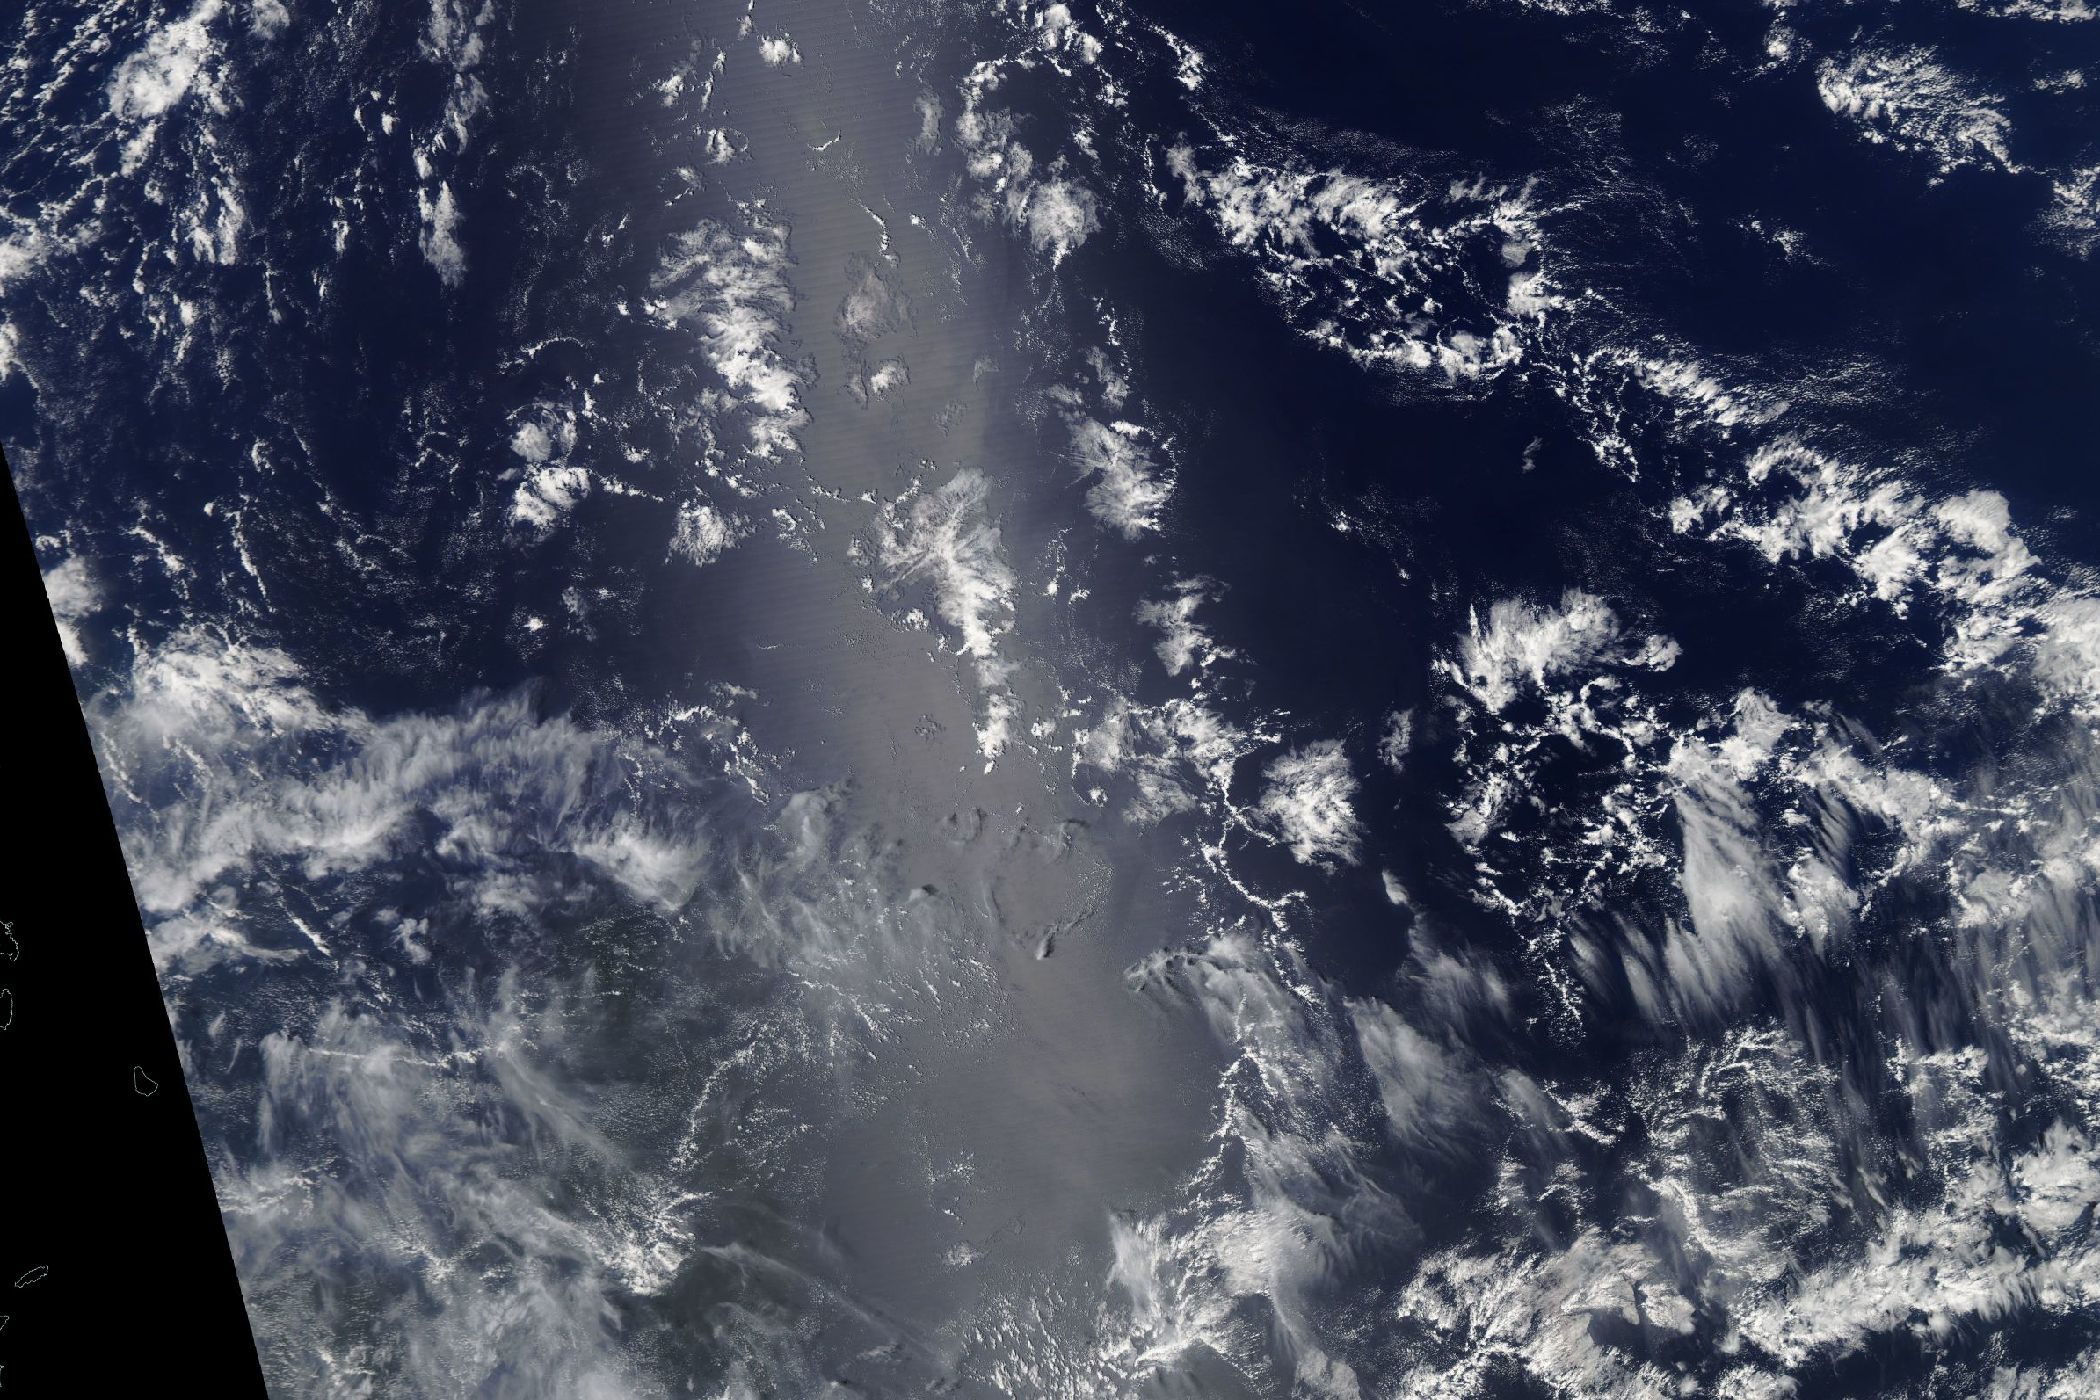

In [73]:
img = Image.open(fn)
img

In [76]:
annos_full.describe()

classification_id       user_id  workflow_id  workflow_version  \
count       4.913200e+04  4.913200e+04      49132.0      4.913200e+04   
mean        1.312658e+08  1.819989e+06       8073.0      1.311000e+01   
std         2.143758e+06  1.736407e+05          0.0      1.101708e-11   
min         1.294863e+08  5.810600e+04       8073.0      1.311000e+01   
25%         1.297251e+08  1.831237e+06       8073.0      1.311000e+01   
50%         1.297458e+08  1.836997e+06       8073.0      1.311000e+01   
75%         1.338836e+08  1.837446e+06       8073.0      1.311000e+01   
max         1.366475e+08  1.849980e+06       8073.0      1.311000e+01   

       gold_standard  expert   subject_ids  subject_set_id             x  \
count            0.0     0.0  4.913200e+04    49132.000000  43375.000000   
mean             NaN     NaN  2.714757e+07    60816.934279    596.894456   
std              NaN     NaN  7.672524e+03        6.468938    535.782875   
min              NaN     NaN  2.713958e+07    60811.000000   -625.336113   
25%              NaN     NaN  2.714246e+07    60813.000000     50.362865   
50%              NaN     NaN  2.714499e+07    60815.000000    503.460297   
75%              NaN     NaN  2.714745e+07    60818.000000   1043.826843   
max              NaN     NaN  2.716404e+07    60835.000000   2184.584961   

                  y         width        height  
count  43375.000000  43375.000000  43375.000000  
mean     397.153757    930.423278    617.489832  
std      340.494136    421.291529    269.037659  
min     -401.602203      5.330444      2.122925  
25%       57.169327    619.957989    421.046638  
50%      344.350464    844.721924    565.703003  
75%      679.340698   1160.294170    763.394661  
max     1312.114868   2658.709204   1586.029033

In [91]:
def plot_img_with_annos(subj_id):
    fig, ax = plt.subplots(figsize=(15, 10))
    fn = str(IMG_PATH + subj[subj.subject_id == subj_id].iloc[0]['fn'])
    img = Image.open(fn)
    ax.imshow(img)
    ans = annos_full[annos_full.subject_ids == subj_id]
    nones = []
    for i, a in ans.iterrows():
        if np.isfinite(a['x']):
            rect = patches.Rectangle((a['x'],a['y']), a['width'], a['height'], facecolor='none', edgecolor='r', lw=2)
            ax.add_patch(rect)
            ax.text(a['x'], a['y'], a['tool_label'] + ' - ' + a['user_name'], color='red', fontsize=15, va='top')
        else:
            nones.append(a['user_name'])
    if len(nones) > 0:
        ax.text(0, -50, 'None: ' + str(nones), color='red', fontsize=15, va='top')
        

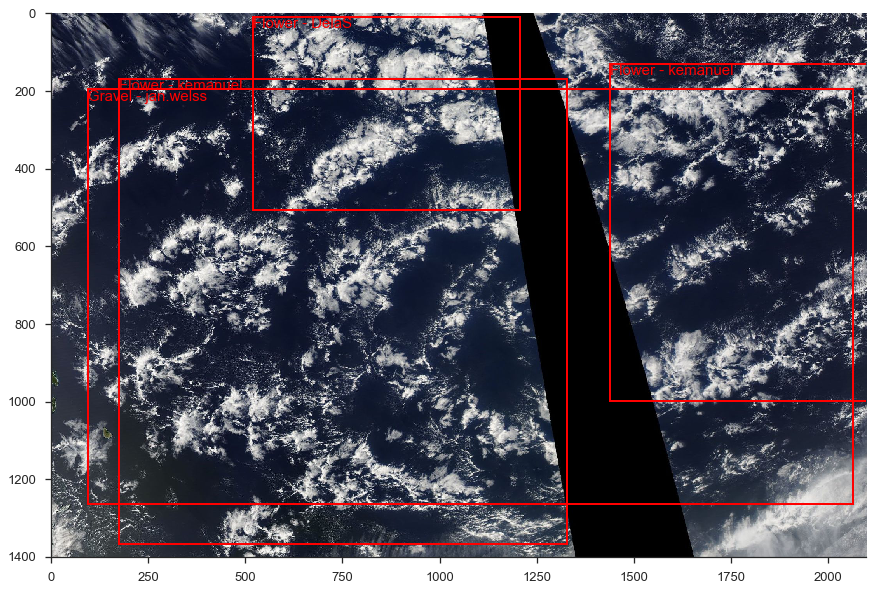

In [227]:
s = subj.subject_id.iloc[149]
plot_img_with_annos(s)

## A simple score

How often did two users see the same class in an image?

In [157]:
ans = annos_full[annos_full.subject_ids == s]
ans

classification_id    user_name    user_id               user_ip  \
15243          129729860   guidocioni  1837447.0  11a1c598b9b3de8733ac   
21320          129739527       bschul  1837000.0  fbca2bce43a7af355a3b   
21321          129739527       bschul  1837000.0  fbca2bce43a7af355a3b   
21322          129739527       bschul  1837000.0  fbca2bce43a7af355a3b   
34593          133875692     kemanuel  1847162.0  7e97a75076f92be60e26   
36586          133883138  green_chile  1845951.0  0588ed390debaa5f38a4   

       workflow_id workflow_name  workflow_version               created_at  \
15243         8073  Full dataset             13.11  2018-11-02 13:06:34 UTC   
21320         8073  Full dataset             13.11  2018-11-02 13:52:46 UTC   
21321         8073  Full dataset             13.11  2018-11-02 13:52:46 UTC   
21322         8073  Full dataset             13.11  2018-11-02 13:52:46 UTC   
34593         8073  Full dataset             13.11  2018-11-29 13:09:30 UTC   
36586         8073  Full dataset             13.11  2018-11-29 14:27:45 UTC   

       gold_standard  expert           ...              subject_set  \
15243            NaN     NaN           ...             BCO_DJF_Aqua   
21320            NaN     NaN           ...             BCO_DJF_Aqua   
21321            NaN     NaN           ...             BCO_DJF_Aqua   
21322            NaN     NaN           ...             BCO_DJF_Aqua   
34593            NaN     NaN           ...             BCO_DJF_Aqua   
36586            NaN     NaN           ...             BCO_DJF_Aqua   

                                                      fn             datetime  \
15243  Region1_DJF_Aqua/Aqua_CorrectedReflectance2008...  2018-11-02 13:06:34   
21320  Region1_DJF_Aqua/Aqua_CorrectedReflectance2008...  2018-11-02 13:52:46   
21321  Region1_DJF_Aqua/Aqua_CorrectedReflectance2008...  2018-11-02 13:52:46   
21322  Region1_DJF_Aqua/Aqua_CorrectedReflectance2008...  2018-11-02 13:52:46   
34593  Region1_DJF_Aqua/Aqua_CorrectedReflectance2008...  2018-11-29 13:09:30   
36586  Region1_DJF_Aqua/Aqua_CorrectedReflectance2008...  2018-11-29 14:27:45   

                 x           y        width      height tool_label  \
15243          NaN         NaN          NaN         NaN        NaN   
21320  1167.279907  557.986572   987.297485  864.651855       Fish   
21321  1024.704346  159.388214   984.231201  357.205414     Gravel   
21322    15.943840  689.830688  1067.017097  361.804565       Fish   
34593   899.818726   96.539413  1015.745239  492.410477     Gravel   
36586          NaN         NaN          NaN         NaN        NaN   

                    started_at              finished_at  
15243  2018-11-02 13:06:30.448  2018-11-02 13:06:34.625  
21320  2018-11-02 13:52:16.050  2018-11-02 13:52:46.356  
21321  2018-11-02 13:52:16.050  2018-11-02 13:52:46.356  
21322  2018-11-02 13:52:16.050  2018-11-02 13:52:46.356  
34593  2018-11-29 13:09:21.240  2018-11-29 13:09:33.064  
36586  2018-11-29 14:08:11.547  2018-11-29 14:27:45.666  

[6 rows x 25 columns]

In [158]:
classes = ['Sugar', 'Flower', 'Fish', 'Gravel']

In [159]:
# Compute agreement between two users
users = ans.user_name.unique()
users

array(['guidocioni', 'bschul', 'kemanuel', 'green_chile'], dtype=object)

In [160]:
from itertools import permutations, combinations

In [161]:
for u in combinations(users, 2):
    print(u)

('guidocioni', 'bschul')
('guidocioni', 'kemanuel')
('guidocioni', 'green_chile')
('bschul', 'kemanuel')
('bschul', 'green_chile')
('kemanuel', 'green_chile')


In [204]:
u2 = ['guidocioni', 'green_chile']

In [205]:
a1 = ans[ans.user_name == u2[0]]

In [206]:
a2 = ans[ans.user_name == u2[1]]

In [221]:
a1

classification_id   user_name    user_id               user_ip  \
15243          129729860  guidocioni  1837447.0  11a1c598b9b3de8733ac   

       workflow_id workflow_name  workflow_version               created_at  \
15243         8073  Full dataset             13.11  2018-11-02 13:06:34 UTC   

       gold_standard  expert           ...              subject_set  \
15243            NaN     NaN           ...             BCO_DJF_Aqua   

                                                      fn             datetime  \
15243  Region1_DJF_Aqua/Aqua_CorrectedReflectance2008...  2018-11-02 13:06:34   

        x   y width height tool_label               started_at  \
15243 NaN NaN   NaN    NaN        NaN  2018-11-02 13:06:30.448   

                   finished_at  
15243  2018-11-02 13:06:34.625  

[1 rows x 25 columns]

In [222]:
a1.dropna(subset=['tool_label'])

Empty DataFrame
Columns: [classification_id, user_name, user_id, user_ip, workflow_id, workflow_name, workflow_version, created_at, gold_standard, expert, metadata, annotations, subject_data, subject_ids, subject_set_id, subject_set, fn, datetime, x, y, width, height, tool_label, started_at, finished_at]
Index: []

[0 rows x 25 columns]

In [207]:
a1.tool_label, a2.tool_label

(15243    NaN
 Name: tool_label, dtype: object, 36586    NaN
 Name: tool_label, dtype: object)

In [210]:
len(set(list(a1.tool_label) + list(a2.tool_label)))

1

In [209]:
set(a1.tool_label) & set(a2.tool_label)

{nan}

In [169]:
agree = 0
for c in classes:
    if np.any(a1.tool_label == c) & np.any(a2.tool_label == c):
        agree += 1        

In [170]:
agree

0

In [171]:
ans[ans.user_name.apply(lambda u: u in u2)].tool_label.unique().

array([nan, 'Gravel'], dtype=object)

In [156]:
num_class = len(ans[ans.user_name.apply(lambda u: u in u2)].tool_label.unique())
num_class

1

In [135]:
agree / num_class

1.0

In [247]:
def simple_agreement(subj_id):
    ans = annos_full[annos_full.subject_ids == subj_id]
    users = ans.user_name.unique()
    
    agree = 0
    tot = 0
    for u1, u2 in combinations(users, 2):
#         print(u1, u2)
        a1 = ans[ans.user_name == u1].dropna(subset=['tool_label'])
        a2 = ans[ans.user_name == u2].dropna(subset=['tool_label'])
        # How many classes in agreement
        agree_tmp = len(set(a1.tool_label) & set(a2.tool_label))
        agree += agree_tmp * 2
        # How many classes in total
        tot += len(set(list(a1.tool_label) + list(a2.tool_label))) + agree_tmp
        
#         print(agree_tmp * 2)
#         print(len(set(list(a1.tool_label) + list(a2.tool_label))) + agree_tmp)

    return agree , tot

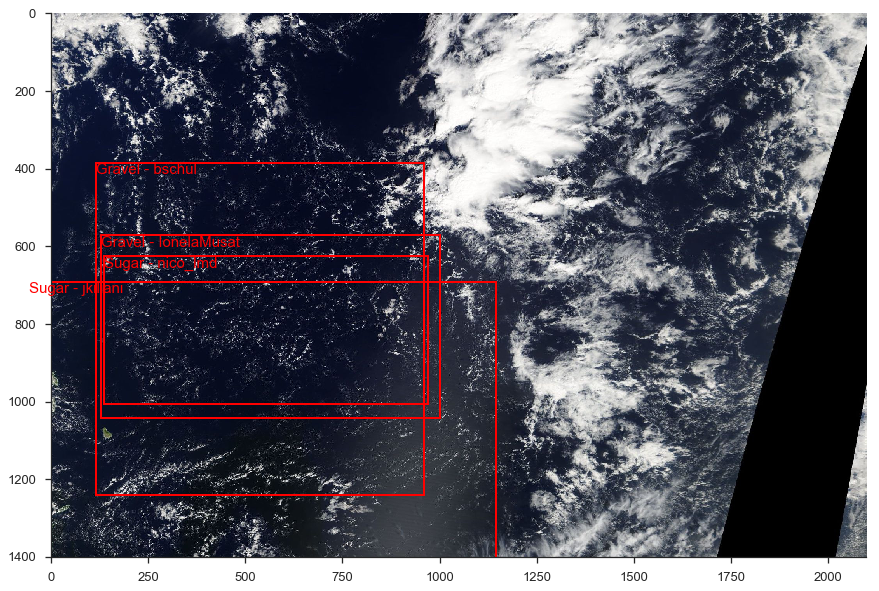

In [239]:
s = subj.subject_id.iloc[1491]
plot_img_with_annos(s)

In [245]:
from tqdm import tqdm_notebook as tqdm

In [248]:
a, t = 0, 0
for s in tqdm(subj.subject_id):
    o = simple_agreement(s)
    a += o[0]; t += o[1]

In [249]:
a, t

(47160, 87729)

In [250]:
a / t

0.5375645453612831